In [1]:
import sys
sys.path.append('../../PI_GP_regressor')

from main_class import PhysicsInformedGP_regressor
from kernels.kernel_poisson import gram_Matrix,k_ff, k_fu, k_uf, k_uu
import numpy as np

 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\poisson\../../PI_GP_regressor\main_class.py:914: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\poisson\../../PI_GP_regressor\main_class.py:926: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\poisson\../../PI_GP_regressor\main_class.py:1003: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\poisson\../../PI_GP_regressor\main_class.py:1015: UserWarning:The balance properties of Sobol' points require n to be a power of 2.
No artists with labels found to put in legend.  Note that artists whose label start wi

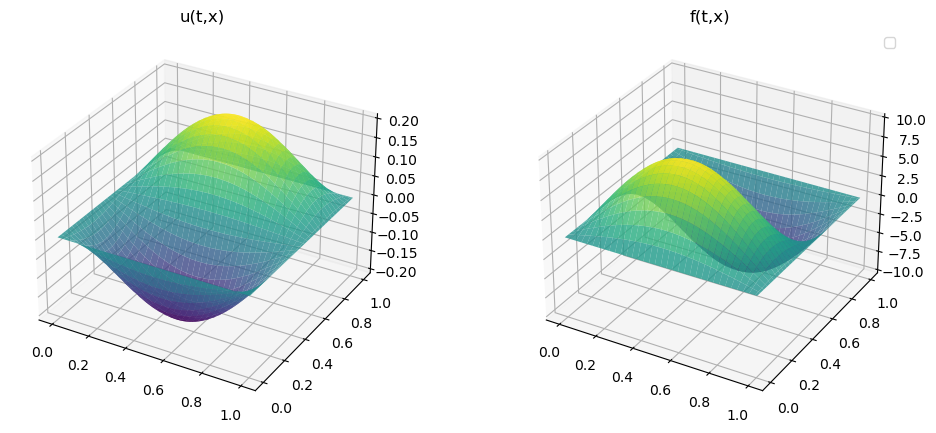

In [81]:
kernel_list = [gram_Matrix, k_uu, k_uf, k_fu, k_ff]
hyperparameters = ["l_x", "sigma_f"]
model = PhysicsInformedGP_regressor(kernel_list,timedependence=True, params = hyperparameters,Dimensions=2)
model.set_name_kernel("poisson")
n_training_points, noise_sq = 25, [1e-8,1e-8]
model.set_training_data("poisson_data.csv",n_training_points, noise_sq)
model.set_validation_data(1000)
model.plot_raw_data()

In [82]:
model.jitter = 1e-6
def get_initial_values():
    """returns the initial values for the hyperparameters
    for the length scales we initialize them randomly as log(l) ~ U(-1.3,1)
    """
    rng = np.random.default_rng()
    theta_initial = np.zeros((2))
    theta_initial[0] = np.exp(rng.uniform(-1.3, 0.4, 1))  #lx
    theta_initial[1] = rng.uniform(0, 1, 1)               #sigma_f              
    return theta_initial
n_restarts = 10
n_threads = 2
opt_params_dict = {'theta_initial': get_initial_values,   #needed for all optimization methods
                    'bounds': ((1e-2, None), (1e-5, None)), #needed for TNC and L-BFGS-B
                    'gtol': 1e-7}
#model.train("Nelder-Mead",n_restarts, n_threads,opt_params_dict)
model.train("TNC",n_restarts, n_threads,opt_params_dict)

100%|██████████| 10/10 [00:04<00:00,  2.33it/s]


     fun: -22.91385841369629
     jac: array([ 3.171875, -0.109375], dtype=float32)
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 91
     nit: 4
  status: 1
 success: True
       x: array([0.43180226, 0.15530763])


In [83]:
n_test_points = 100
x_star, t_star = np.meshgrid(np.linspace(0, 1, n_test_points), np.linspace(0, 1, n_test_points))
X_star = np.hstack((x_star.flatten()[:, None], t_star.flatten()[:, None]))
model.predict_model(X_star)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


-----------------------------------------------
GP with kernel: 
Training data: (25, 2)
Training targets: (50, 1)
Hyperparameters: {'l_x': 0.4318022578981301, 'sigma_f': 0.1553076250953028}
Log marginal likelihood: -22.91385841369629
Mean squared error: {'u': 3.2771022233646363e-06, 'f': 0.007033923175185919}
Relative l2 error: {'u': 0.018045540282925307, 'f': 0.016941436767578123}
-----------------------------------------------



 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\poisson\../../PI_GP_regressor\main_class.py:657: RuntimeWarning:invalid value encountered in sqrt


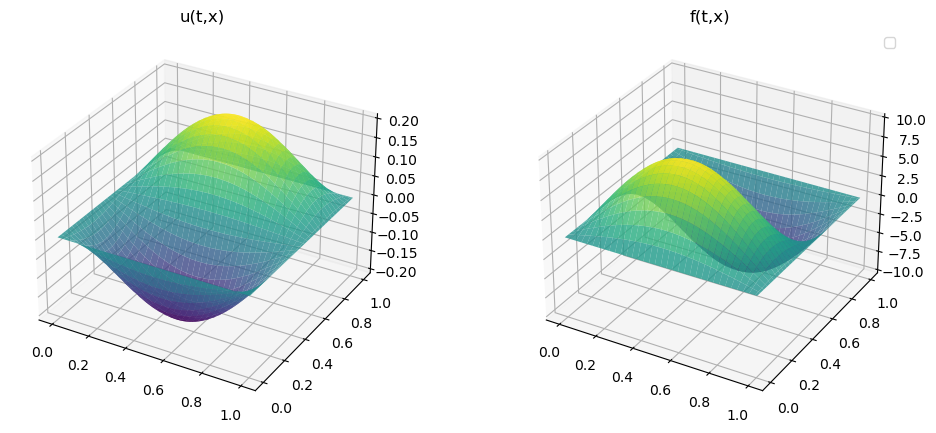

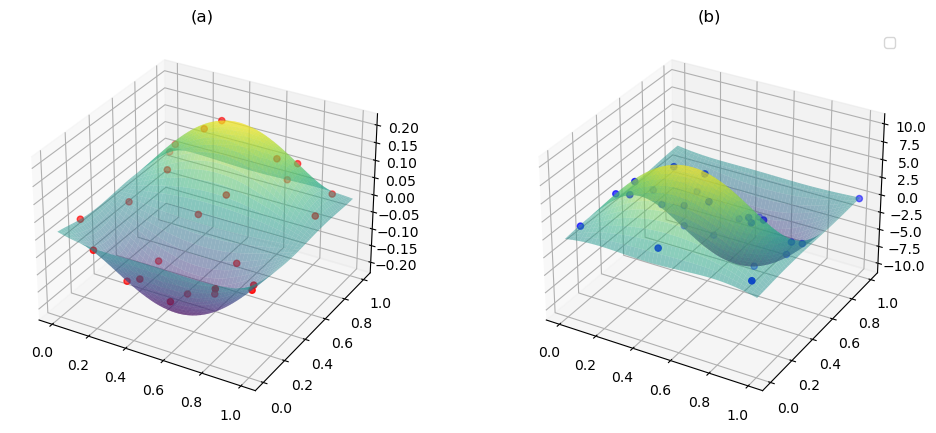

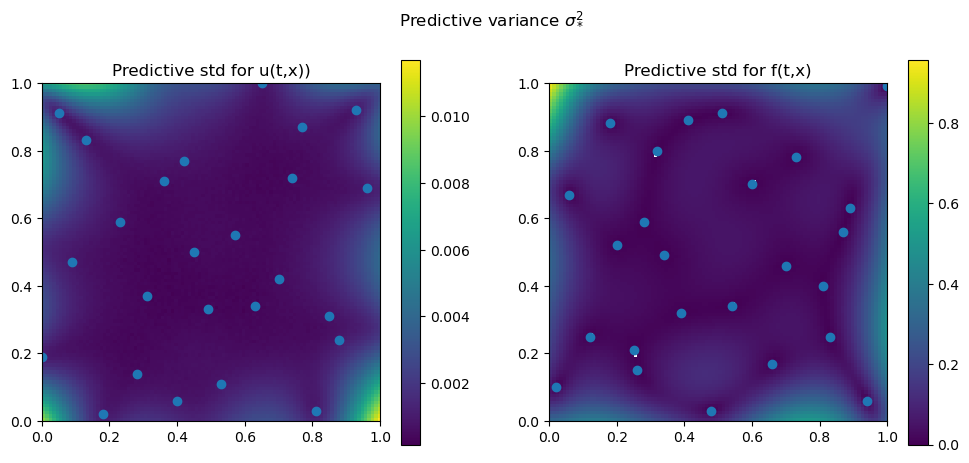

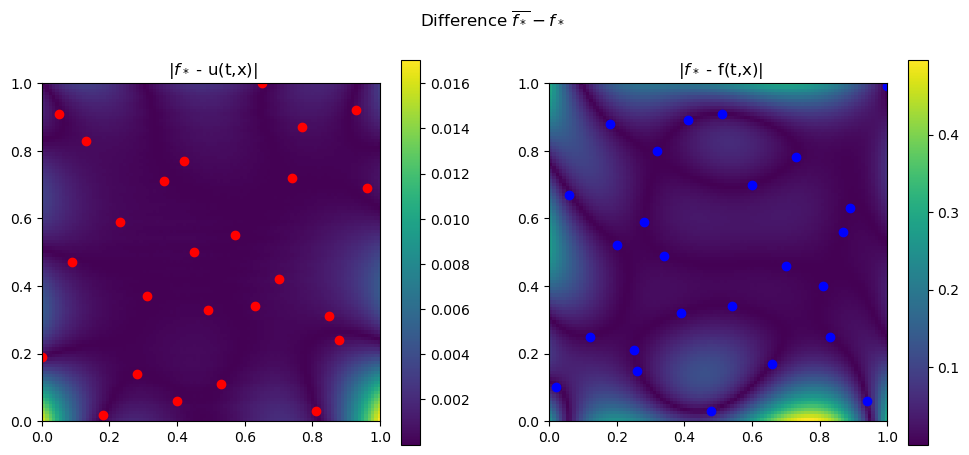

In [84]:
model.plot_raw_data(heat_map=False)
model.plot_prediction(X_star, "","predictive_mean.png",False)
model.error()
print(model)
model.plot_variance(X_star, "Predictive variance $\\sigma_*^2$", "predictive_variance.png")
model.plot_difference( "Difference $\\overline{ f_*} - f_*$", "difference.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


MSE_u:  2.0707793478709236e-07
MSE_f:  0.00019200779857216408
relative error u:  0.004536196264878275
relative error f:  0.0027990509486142947


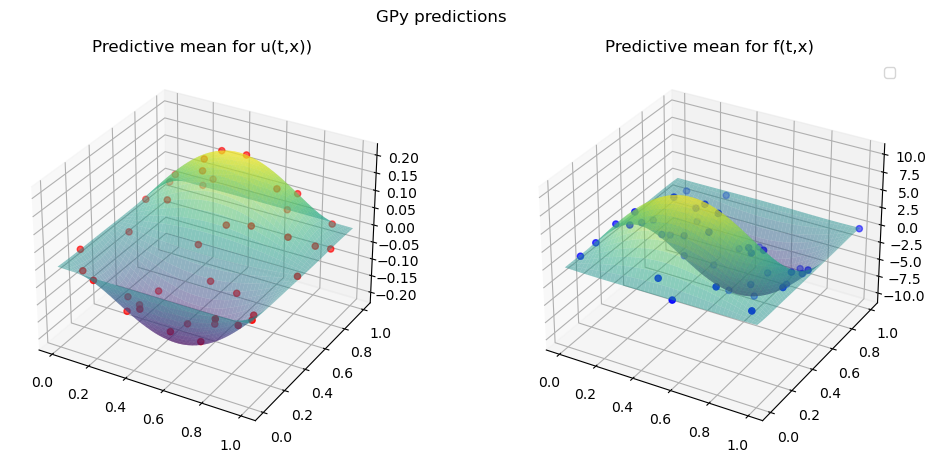

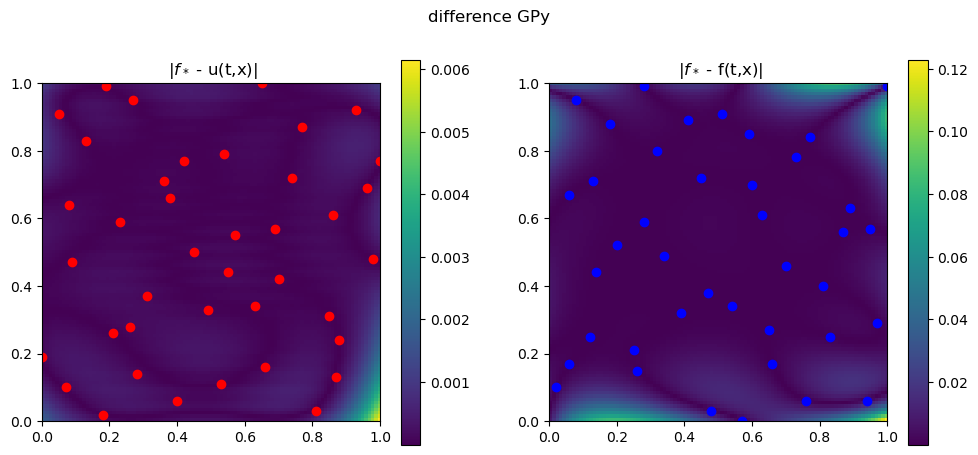

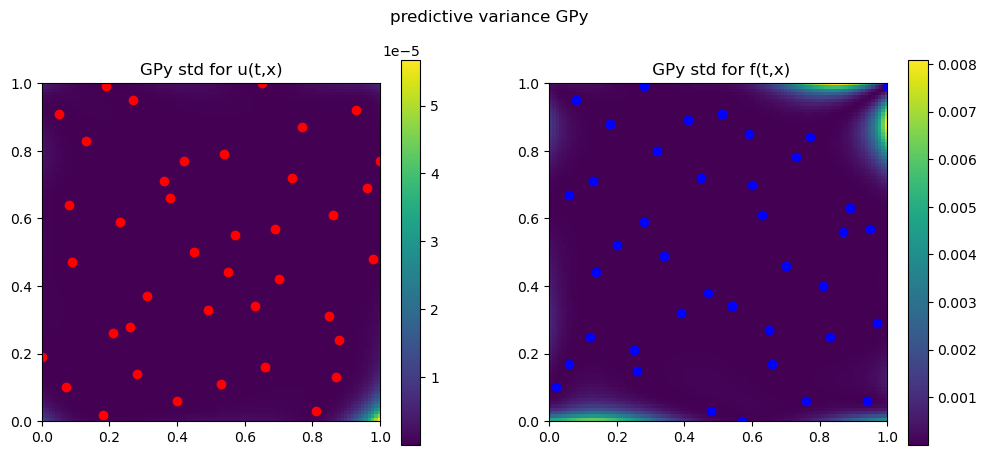

In [80]:
model.use_GPy(X_star,"gpy")
model.plot_difference_GPy("difference GPy ", "GPy_difference.png")
model.plot_variance_GPy("predictive variance GPy ", "GPy_variance.png")

 c:\Users\Razer\OneDrive - Technische Universität Graz\Dokumente\Uni\BAC\Code_bac\final_examples\poisson\../../PI_GP_regressor\main_class.py:1151: RuntimeWarning:invalid value encountered in sqrt


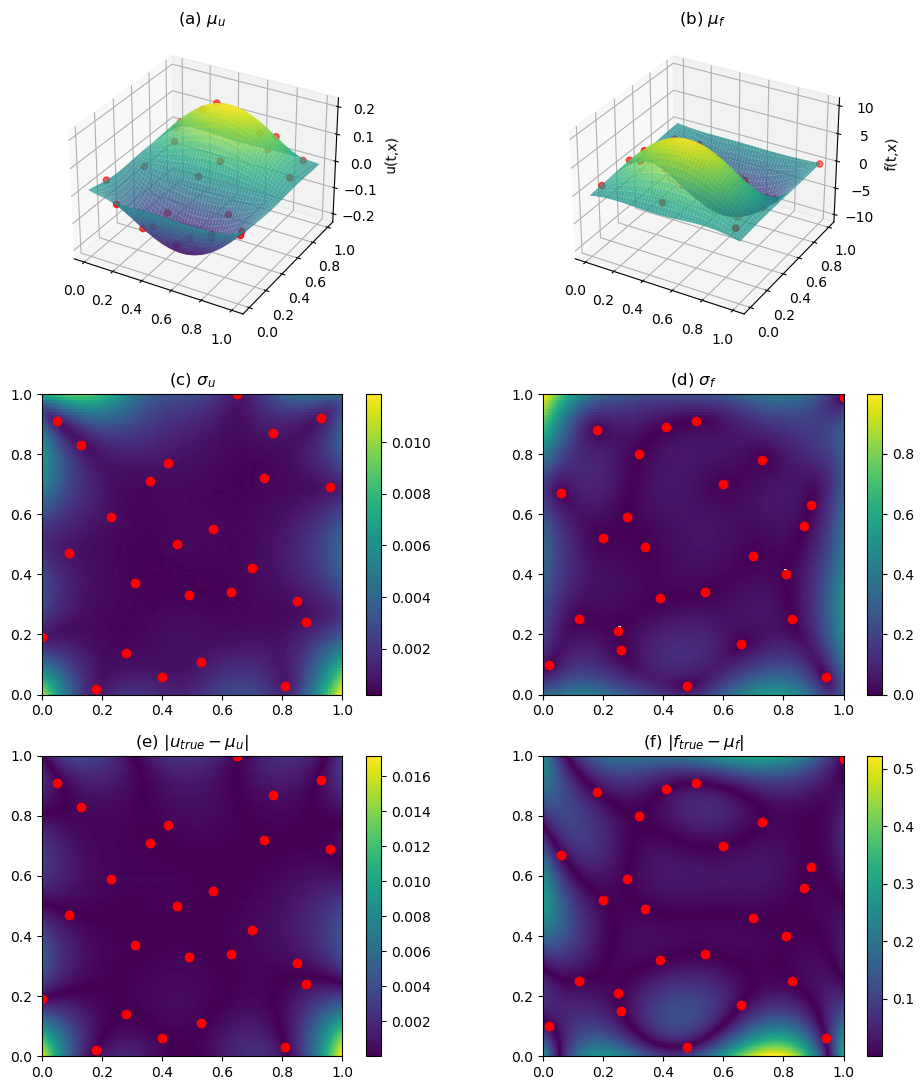

In [ ]:
#model.set_axis_labels("x","t")
model.plot_merged_2d_plots(X_star,"merged_2d_plots.png",figsize=(10,11))


In [11]:
#model.plot_GPYmeandiff(X_star,"GPy_mean_diff.png",figsize=(10,9))

(101, 101)
(101, 101)


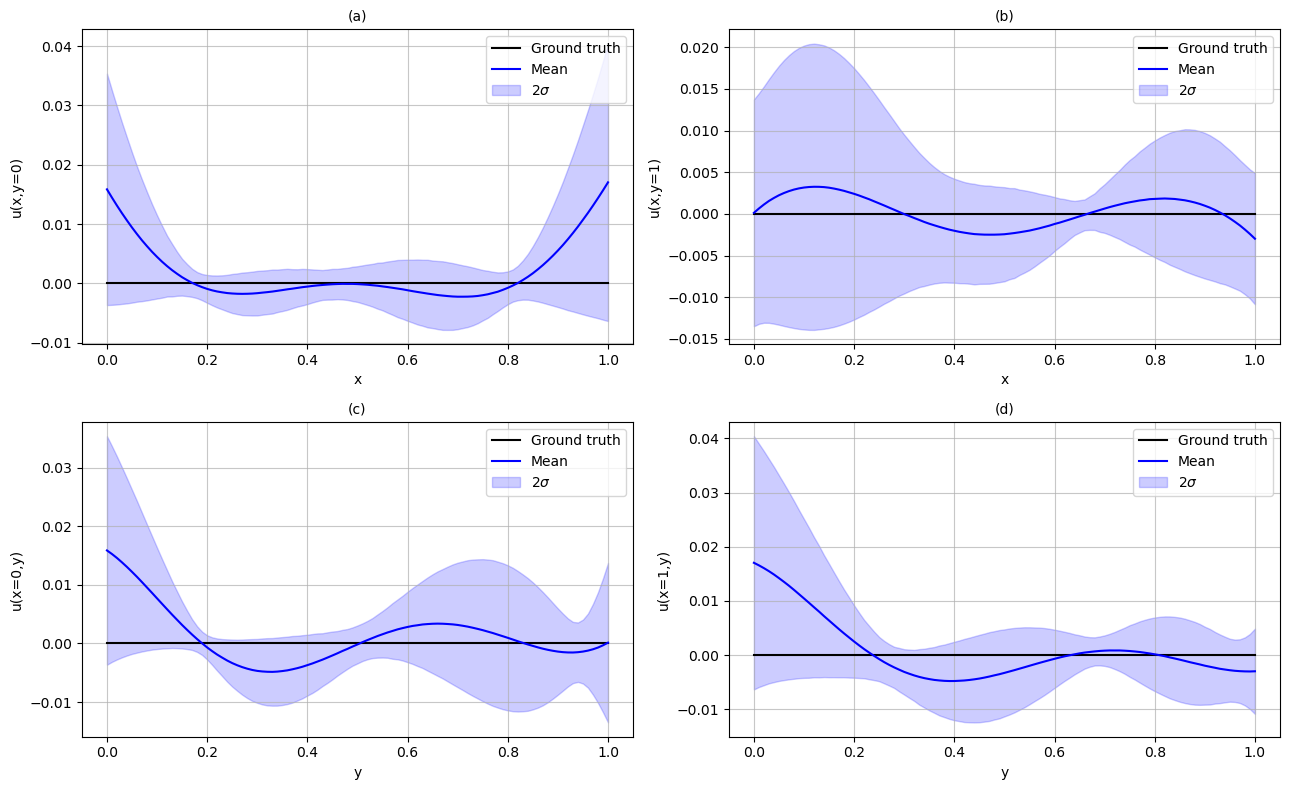

In [85]:
axis = [0,0,1,1]
index = [0,100,0,100]
model.set_axis_labels("x","y")
model.plot_1d_cut(axis,index,"boundaries.png")